In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import sklearn.metrics as metrics

In [3]:
df= pd.read_excel("C:/Users/Neeraj Arora/important files/Customer Churn Data.xlsx")

In [4]:
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [5]:
df.shape

(11260, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [9]:
df.isnull().sum().sum()

2676

In [10]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [12]:
df= df.drop(['AccountID'], axis=1)

In [13]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [14]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,NaN,NaN,NaN,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0


In [15]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [16]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
['Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


In [17]:
for i in cat:
    print(i.upper(), ":", df[i].nunique())
    print(df[i].unique())
    print(df[i].value_counts(normalize= True))
    print('\n')

TENURE : 38
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
1     0.121079
0     0.110324
8     0.046514
9     0.044452
7     0.040330
10    0.037910
3     0.036745
5     0.036118
4     0.036118
11    0.034773
6     0.032533
12    0.032264
13    0.032174
2     0.031726
14    0.030920
15    0.027872
16    0.026080
19    0.024467
18    0.022674
20    0.019448
17    0.019269
21    0.015236
23    0.015146
22    0.013533
24    0.013174
28    0.012278
30    0.012278
27    0.011740
99    0.011740
26    0.010934
#     0.010396
25    0.010217
29    0.010217
31    0.008604
50    0.000179
60    0.000179
51    0.000179
61    0.000179
Name: Tenure, dtype: float64


PAYMENT : 5
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Debit Card          0.411353
Credit Card         0.314860
E wallet            0.109138
Cash on Delivery    0.090934
UPI                 0.073715
Name: Payment, dtype: float64


GENDER : 4
['Fema

In [18]:
df[df.Tenure== "#"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
12,1,#,1.0,11.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,2,1.0,13,2,2,134.41,Mobile
15,1,#,2.0,12.0,UPI,Male,3.0,3,Regular Plus,5.0,Married,5,1.0,22,1,2,120.73,Mobile
575,1,#,1.0,8.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,5,0.0,24,1,0,124.79,Mobile
754,0,#,3.0,13.0,E wallet,Male,2.0,1,Super,2.0,Married,1,1.0,18,0,9,152.2,Mobile
979,0,#,1.0,15.0,Debit Card,Male,3.0,1,Regular Plus,3.0,Married,7,0.0,18,1,0,124.51,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,0,#,1.0,15.0,Credit Card,Male,3.0,5,Super,1.0,Married,5,0.0,17,1,14,169.86,Mobile
11057,0,#,3.0,24.0,Debit Card,Male,3.0,4,Super,3.0,Married,7,1.0,16,2,8,170.01,Computer
11150,0,#,1.0,18.0,Credit Card,Female,4.0,2,Regular Plus,3.0,Married,12,0.0,14,2,3,168.78,Mobile
11157,0,#,1.0,12.0,Cash on Delivery,Male,3.0,4,Regular Plus,4.0,Married,3,0.0,13,1,3,152.26,Mobile


In [19]:
df[df.Account_user_count== "@"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
88,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7,224.9,&&&&
110,0,16,3.0,22.0,E wallet,Female,3.0,@,Super +,2.0,Divorced,+,1.0,22,0,9,260.64,&&&&
170,0,15,3.0,32.0,E wallet,Female,3.0,@,Super +,4.0,Divorced,+,0.0,14,2,8,235.25,&&&&
216,0,11,1.0,21.0,Debit Card,Male,3.0,@,HNI,2.0,Married,+,1.0,14,1,9,215.1,&&&&
241,1,4,3.0,10.0,E wallet,Male,2.0,@,Super,4.0,Single,+,0.0,18,7,7,193.55,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11109,0,6,3.0,20.0,E wallet,Male,4.0,@,Super,1.0,Single,+,0.0,16,1,1,176.48,&&&&
11155,1,1,3.0,34.0,Cash on Delivery,Male,3.0,@,Regular +,5.0,Single,+,0.0,19,1,1,141.91,&&&&
11159,1,1,3.0,25.0,E wallet,Female,3.0,@,Super,3.0,Single,+,1.0,14,1,3,223.54,&&&&
11168,0,16,3.0,21.0,E wallet,Male,4.0,@,Super,1.0,Married,+,1.0,15,2,1,180.87,&&&&


In [20]:
df[df.rev_per_month== "+"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
19,1,19,1.0,20.0,Debit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,18,1,3,149.63,Mobile
38,0,30,1.0,30.0,Debit Card,Male,2.0,2,HNI,2.0,Married,+,NaN,16,1,4,194.39,Mobile
60,0,6,1.0,20.0,Credit Card,Female,3.0,3,Regular +,4.0,Divorced,+,NaN,13,0,6,127.56,Mobile
65,0,25,1.0,6.0,Debit Card,Male,3.0,4,Regular,3.0,Divorced,+,NaN,14,1,9,299.99,Mobile
88,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7,224.9,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,0,16,1.0,37.0,Debit Card,Male,3.0,5,Super,3.0,Single,+,NaN,13,4,8,171.32,Computer
11197,0,1,1.0,10.0,Debit Card,Male,3.0,@,Super,3.0,Single,+,0.0,15,2,3,175.17,&&&&
11203,0,1,1.0,13.0,UPI,Male,3.0,4,Regular +,3.0,Married,+,NaN,20,1,3,170.77,Mobile
11227,0,13,1.0,20.0,Debit Card,Male,3.0,4,Regular,1.0,Single,+,NaN,15,2,4,325.31,Computer


In [21]:
df[df.rev_growth_yoy== "$"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
3127,0,4,3.0,14.0,E wallet,Male,3.0,4,Regular Plus,4.0,Single,2,0.0,$,2,3,154.83,Mobile
5837,0,27,1.0,29.0,Debit Card,Female,2.0,3,Super,3.0,Single,7,0.0,$,1,3,151.69,Computer
6329,0,15,1.0,41.0,Credit Card,Male,2.0,5,Super,2.0,Single,5,0.0,$,1,0,145.72,Mobile


In [22]:
df[df.coupon_used_for_payment== "#"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1910,0,0,1.0,16.0,Credit Card,Male,3.0,1,Regular Plus,3.0,Single,2,0.0,18,#,2,135.05,Mobile


In [23]:
df[df.coupon_used_for_payment== "$"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
2511,0,21,1.0,10.0,Credit Card,Male,2.0,4,Super Plus,1.0,Married,3,0.0,25,$,2,252.02,Computer


In [24]:
df[df.coupon_used_for_payment== "*"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
3136,0,15,3.0,17.0,Debit Card,Male,3.0,4,Super,2.0,Single,9,0.0,15,*,11,187.3,Computer


In [25]:
df[df.Day_Since_CC_connect== "$"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1663,0,0,1.0,11.0,Debit Card,Female,2.0,3,Regular Plus,4.0,Single,2,1.0,12,0,$,124.78,Mobile


In [26]:
df[df.cashback== "$"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,0,0,1.0,16.0,Credit Card,Male,3.0,2,Regular Plus,3.0,Single,2,0.0,18,1,2,$,Mobile
1257,0,4,1.0,9.0,Credit Card,Male,2.0,3,Regular +,5.0,Married,+,NaN,13,0,3,$,Computer


In [27]:
df[df.Login_device== "&&&&"]

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
39,0,0,1.0,9.0,NaN,M,3.0,4,Regular Plus,3.0,Married,2,1.0,15,0,1,125.66,&&&&
49,0,18,3.0,10.0,NaN,F,1.0,3,Super,5.0,Married,5,1.0,11,0,3,150.06,&&&&
75,0,0,1.0,6.0,NaN,M,2.0,4,Super,5.0,Divorced,6,0.0,19,0,0,142.98,&&&&
88,0,24,1.0,14.0,Debit Card,Male,2.0,@,HNI,4.0,Divorced,+,0.0,16,1,7,224.9,&&&&
110,0,16,3.0,22.0,E wallet,Female,3.0,@,Super +,2.0,Divorced,+,1.0,22,0,9,260.64,&&&&
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1,1,3.0,34.0,Cash on Delivery,Male,3.0,@,Regular +,5.0,Single,+,0.0,19,1,1,141.91,&&&&
11159,1,1,3.0,25.0,E wallet,Female,3.0,@,Super,3.0,Single,+,1.0,14,1,3,223.54,&&&&
11168,0,16,3.0,21.0,E wallet,Male,4.0,@,Super,1.0,Married,+,1.0,15,2,1,180.87,&&&&
11197,0,1,1.0,10.0,Debit Card,Male,3.0,@,Super,3.0,Single,+,0.0,15,2,3,175.17,&&&&


In [28]:
df["Tenure"] = df['Tenure'].replace(to_replace='#', value=np.nan)

In [29]:
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [30]:
df['Account_user_count']= df['Account_user_count'].replace(to_replace='@', value=np.nan)

In [31]:
df['Account_user_count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [32]:
df['rev_per_month']= df['rev_per_month'].replace(to_replace='+', value=np.nan)

In [33]:
df['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [34]:
df['rev_growth_yoy']= df['rev_growth_yoy'].replace(to_replace= '$', value= np.nan)

In [35]:
df['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [36]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace(to_replace=['#', '$', '*'],value=np.nan)

In [37]:
df['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [38]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace(to_replace='$', value=np.nan)

In [39]:
df['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [40]:
df['cashback'] = df['cashback'].replace(to_replace='$', value=np.nan)

In [41]:
df['cashback'].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [42]:
df['Login_device'] = df['Login_device'].replace(to_replace='&&&&', value=np.nan)

In [43]:
df['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [44]:
df['Gender'] = df['Gender'].replace(to_replace='M', value='Male')
df['Gender'] = df['Gender'].replace(to_replace='F', value='Female')

In [45]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [46]:
df['account_segment'] = df['account_segment'].replace(to_replace='Regular +', value='Regular Plus')
df['account_segment'] = df['account_segment'].replace(to_replace='Super + ', value='Super Plus')

In [47]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus',
       'Super +'], dtype=object)

In [48]:
df['account_segment'] = df['account_segment'].replace(to_replace='Super +', value='Super Plus')

In [49]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [51]:
df['Churn'].value_counts(normalize= True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [52]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [53]:
len(df)

11260

In [54]:
df.isnull().sum().sum()

4361

In [55]:
4361/11260

0.38730017761989344

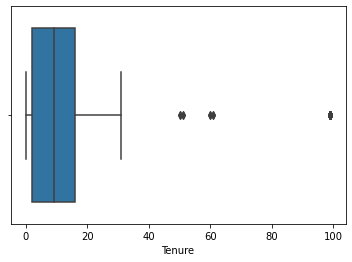

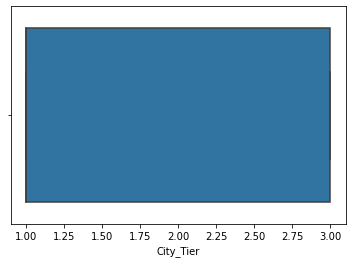

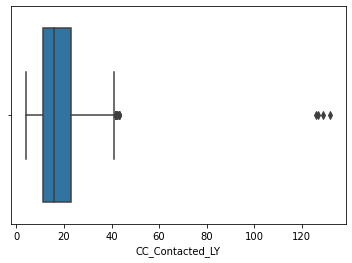

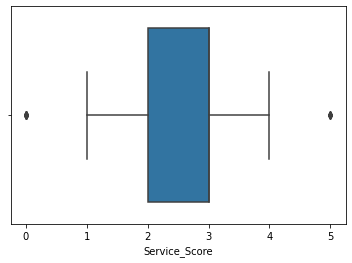

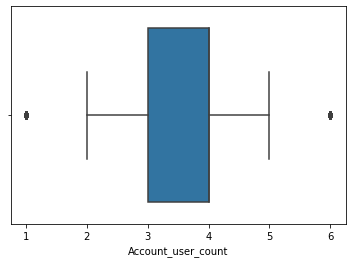

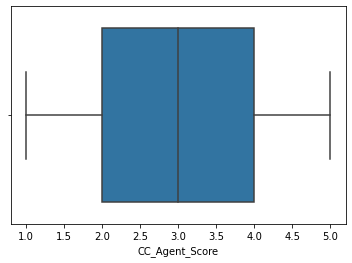

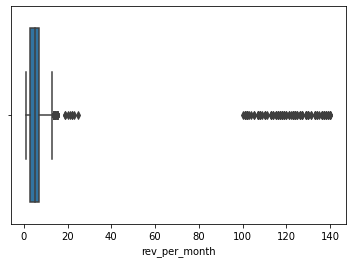

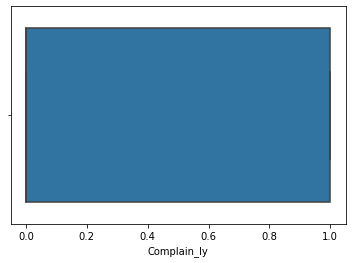

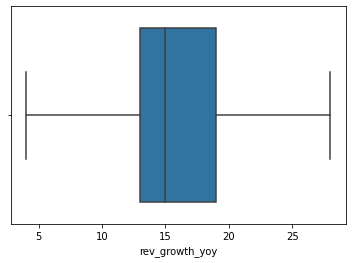

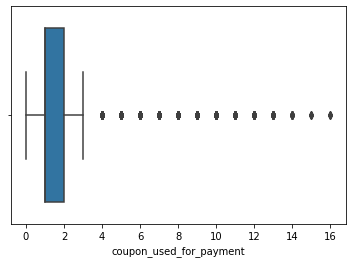

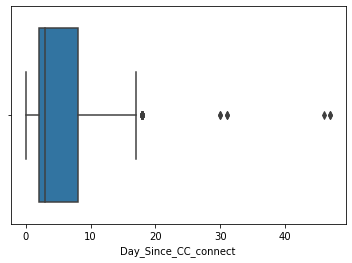

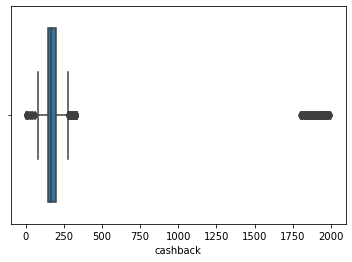

In [56]:
cols= ['Tenure','City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
      'Day_Since_CC_connect', 'cashback']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [57]:
df['City_Tier'].fillna(df['City_Tier'].mean(), inplace=True)
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mean(), inplace=True)
df['Complain_ly'].fillna(df['Complain_ly'].mean(), inplace=True)
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].mean(), inplace=True)

In [58]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)
df['Service_Score'].fillna(df['Service_Score'].median(), inplace=True)
df['Account_user_count'].fillna(df['Account_user_count'].median(), inplace=True)
df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median(), inplace=True)
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(), inplace=True)
df['rev_per_month'].fillna(df['rev_per_month'].median(), inplace=True)
df['cashback'].fillna(df['cashback'].median(), inplace=True)

In [59]:
df['Payment'].mode()

0    Debit Card
dtype: object

In [60]:
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

In [61]:
df['Gender'].mode()

0    Male
dtype: object

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [63]:
df['account_segment'].mode()

0    Regular Plus
dtype: object

In [64]:
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)

In [65]:
df['Marital_Status'].mode()

0    Married
dtype: object

In [66]:
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

In [67]:
df['Login_device'].mode()

0    Mobile
dtype: object

In [68]:
df['Login_device'].fillna(df['Login_device'].mode()[0], inplace=True)

In [69]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'City_Tier'}>,
        <AxesSubplot:title={'center':'CC_Contacted_LY'}>],
       [<AxesSubplot:title={'center':'Service_Score'}>,
        <AxesSubplot:title={'center':'Account_user_count'}>,
        <AxesSubplot:title={'center':'CC_Agent_Score'}>,
        <AxesSubplot:title={'center':'rev_per_month'}>],
       [<AxesSubplot:title={'center':'Complain_ly'}>,
        <AxesSubplot:title={'center':'rev_growth_yoy'}>,
        <AxesSubplot:title={'center':'coupon_used_for_payment'}>,
        <AxesSubplot:title={'center':'Day_Since_CC_connect'}>],
       [<AxesSubplot:title={'center':'cashback'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

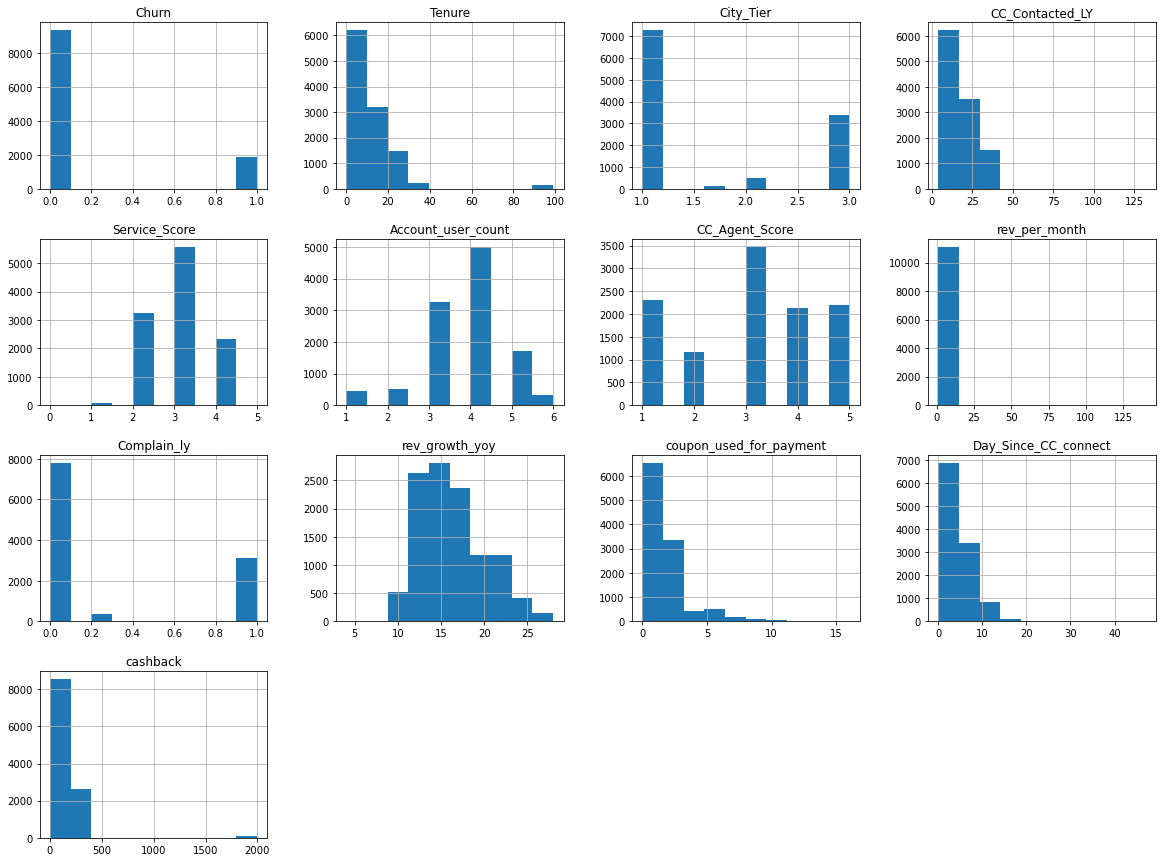

In [71]:
df.hist(figsize= (20,15))

In [72]:
def remove_outlier(cols):
    sorted(cols)
    Q1,Q3=np.percentile(cols,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [73]:
for column in df[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment','Day_Since_CC_connect','cashback']].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

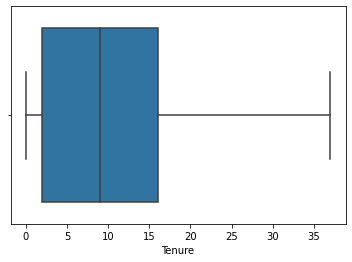

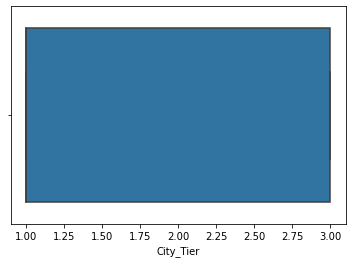

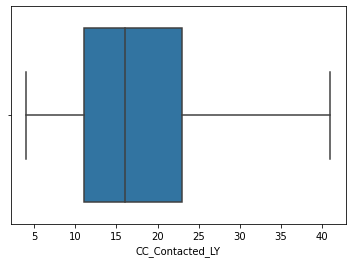

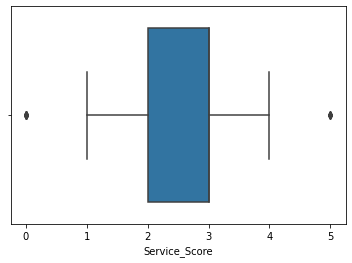

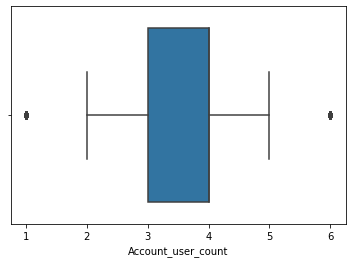

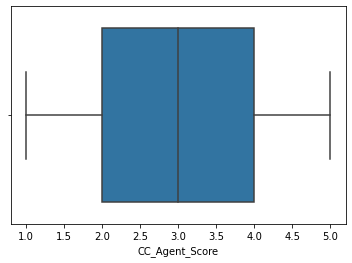

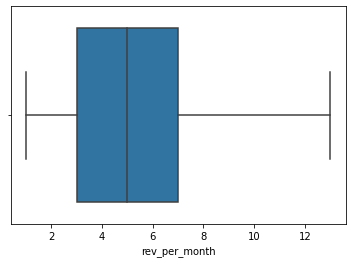

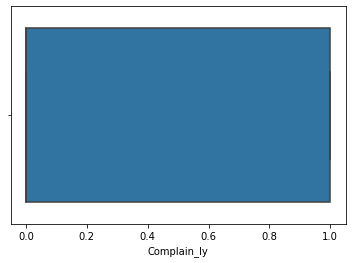

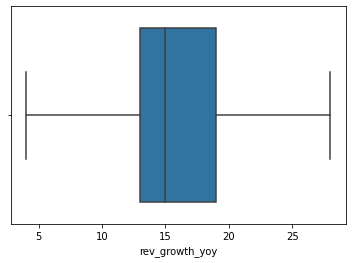

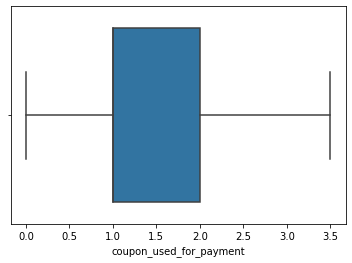

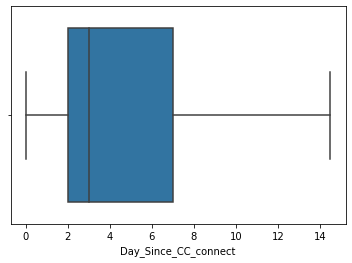

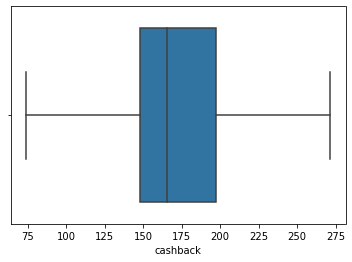

In [74]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'City_Tier'}>,
        <AxesSubplot:title={'center':'CC_Contacted_LY'}>],
       [<AxesSubplot:title={'center':'Service_Score'}>,
        <AxesSubplot:title={'center':'Account_user_count'}>,
        <AxesSubplot:title={'center':'CC_Agent_Score'}>,
        <AxesSubplot:title={'center':'rev_per_month'}>],
       [<AxesSubplot:title={'center':'Complain_ly'}>,
        <AxesSubplot:title={'center':'rev_growth_yoy'}>,
        <AxesSubplot:title={'center':'coupon_used_for_payment'}>,
        <AxesSubplot:title={'center':'Day_Since_CC_connect'}>],
       [<AxesSubplot:title={'center':'cashback'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

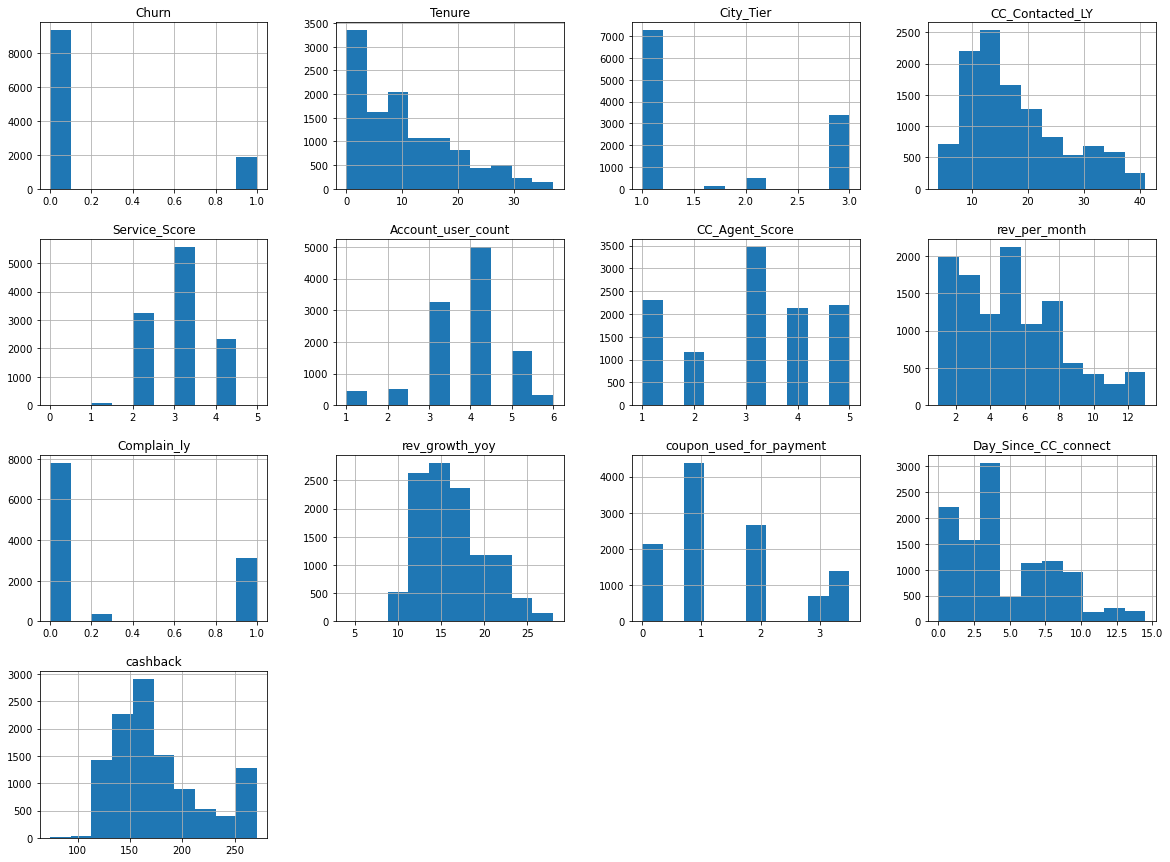

In [75]:
df.hist(figsize= (20,15))

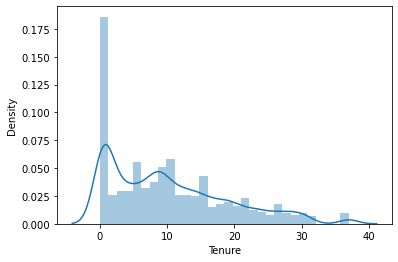

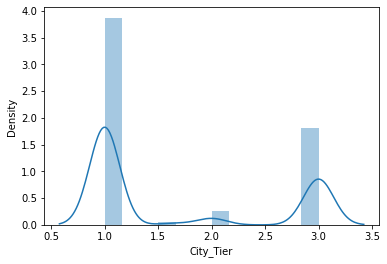

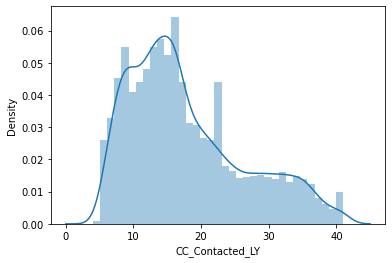

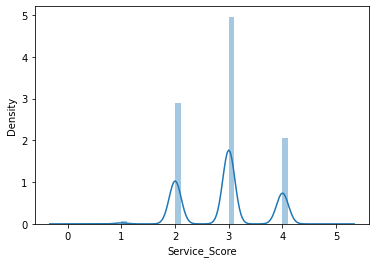

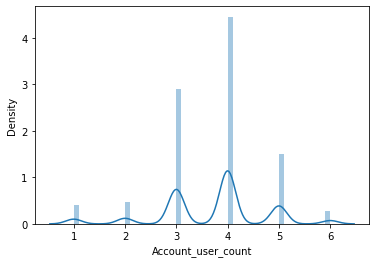

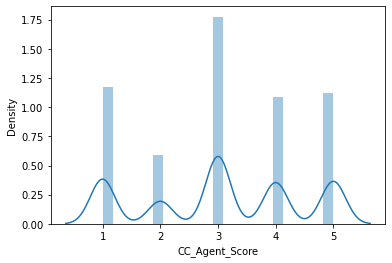

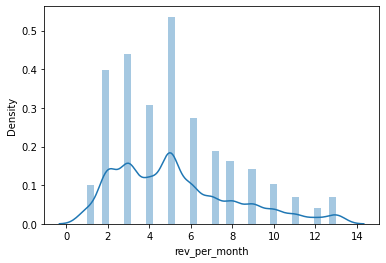

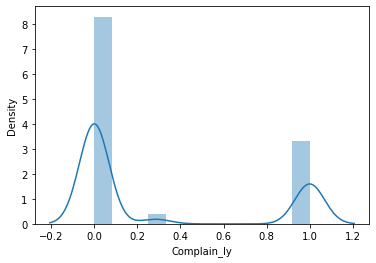

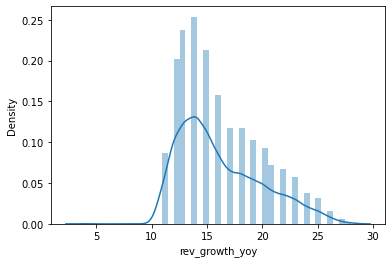

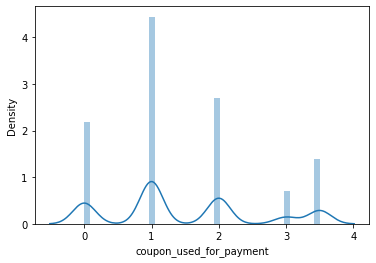

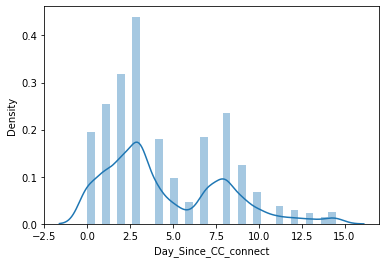

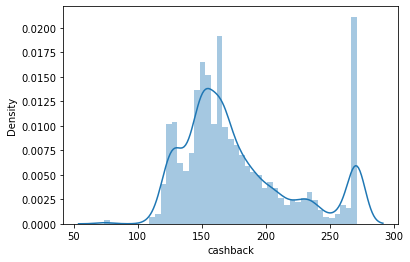

In [76]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

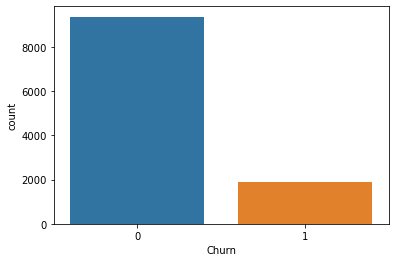

In [77]:
sns.countplot(data= df, x= 'Churn')

<AxesSubplot:xlabel='Gender', ylabel='count'>

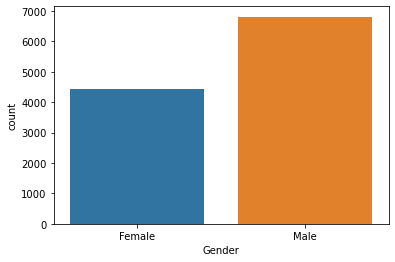

In [78]:
sns.countplot(data= df, x= 'Gender')

<AxesSubplot:xlabel='Payment', ylabel='count'>

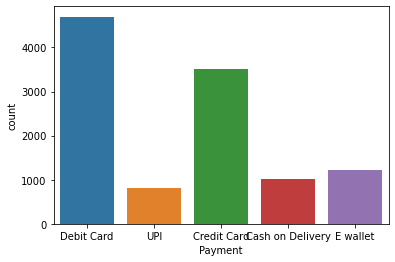

In [79]:
sns.countplot(data= df, x= 'Payment')

<AxesSubplot:xlabel='Login_device', ylabel='count'>

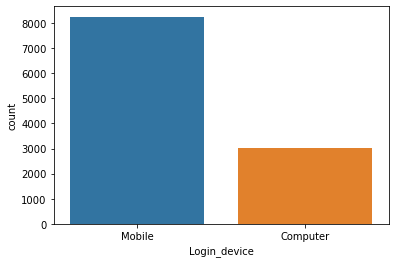

In [80]:
sns.countplot(data= df, x= 'Login_device')

<Figure size 1080x576 with 0 Axes>

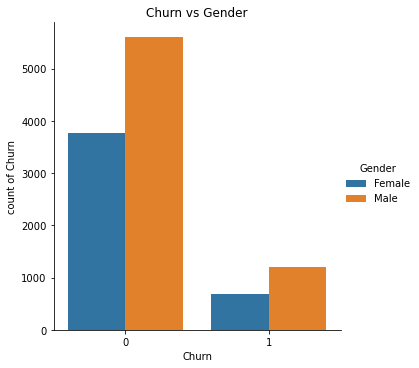

In [81]:
plt.figure(figsize=(15,8))
ax= sns.catplot(x= "Churn", hue= 'Gender', kind= 'count', data= df)
plt.title('Churn vs Gender')
plt.xlabel('Churn')
plt.ylabel('count of Churn');

<Figure size 1080x576 with 0 Axes>

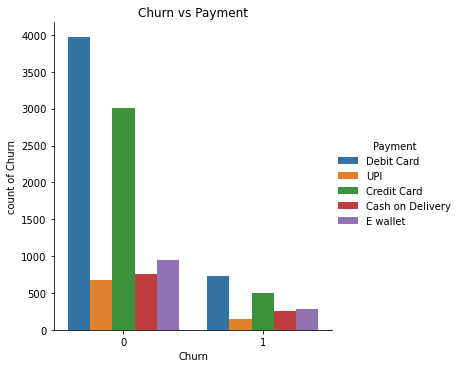

In [82]:
plt.figure(figsize=(15,8))
ax= sns.catplot(x= "Churn", hue= 'Payment', kind= 'count', data= df)
plt.title('Churn vs Payment')
plt.xlabel('Churn')
plt.ylabel('count of Churn');

<Figure size 1080x576 with 0 Axes>

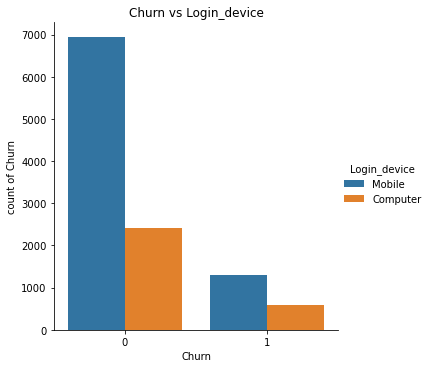

In [83]:
plt.figure(figsize=(15,8))
ax= sns.catplot(x= "Churn", hue= 'Login_device', kind= 'count', data= df)
plt.title('Churn vs Login_device')
plt.xlabel('Churn')
plt.ylabel('count of Churn');

<Figure size 1080x576 with 0 Axes>

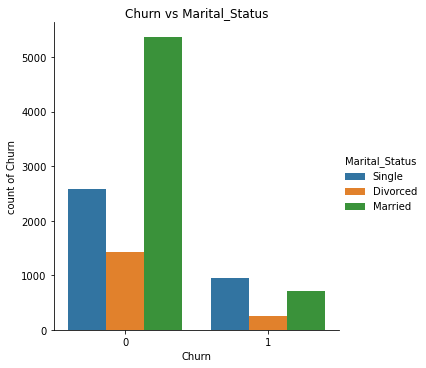

In [84]:
plt.figure(figsize=(15,8))
ax= sns.catplot(x= "Churn", hue= 'Marital_Status', kind= 'count', data= df)
plt.title('Churn vs Marital_Status')
plt.xlabel('Churn')
plt.ylabel('count of Churn');

<Figure size 1080x576 with 0 Axes>

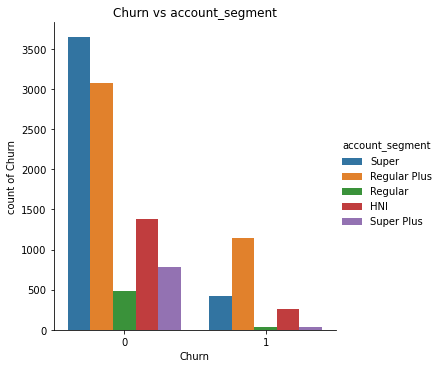

In [85]:
plt.figure(figsize=(15,8))
ax= sns.catplot(x= "Churn", hue= 'account_segment', kind= 'count', data= df)
plt.title('Churn vs account_segment')
plt.xlabel('Churn')
plt.ylabel('count of Churn');

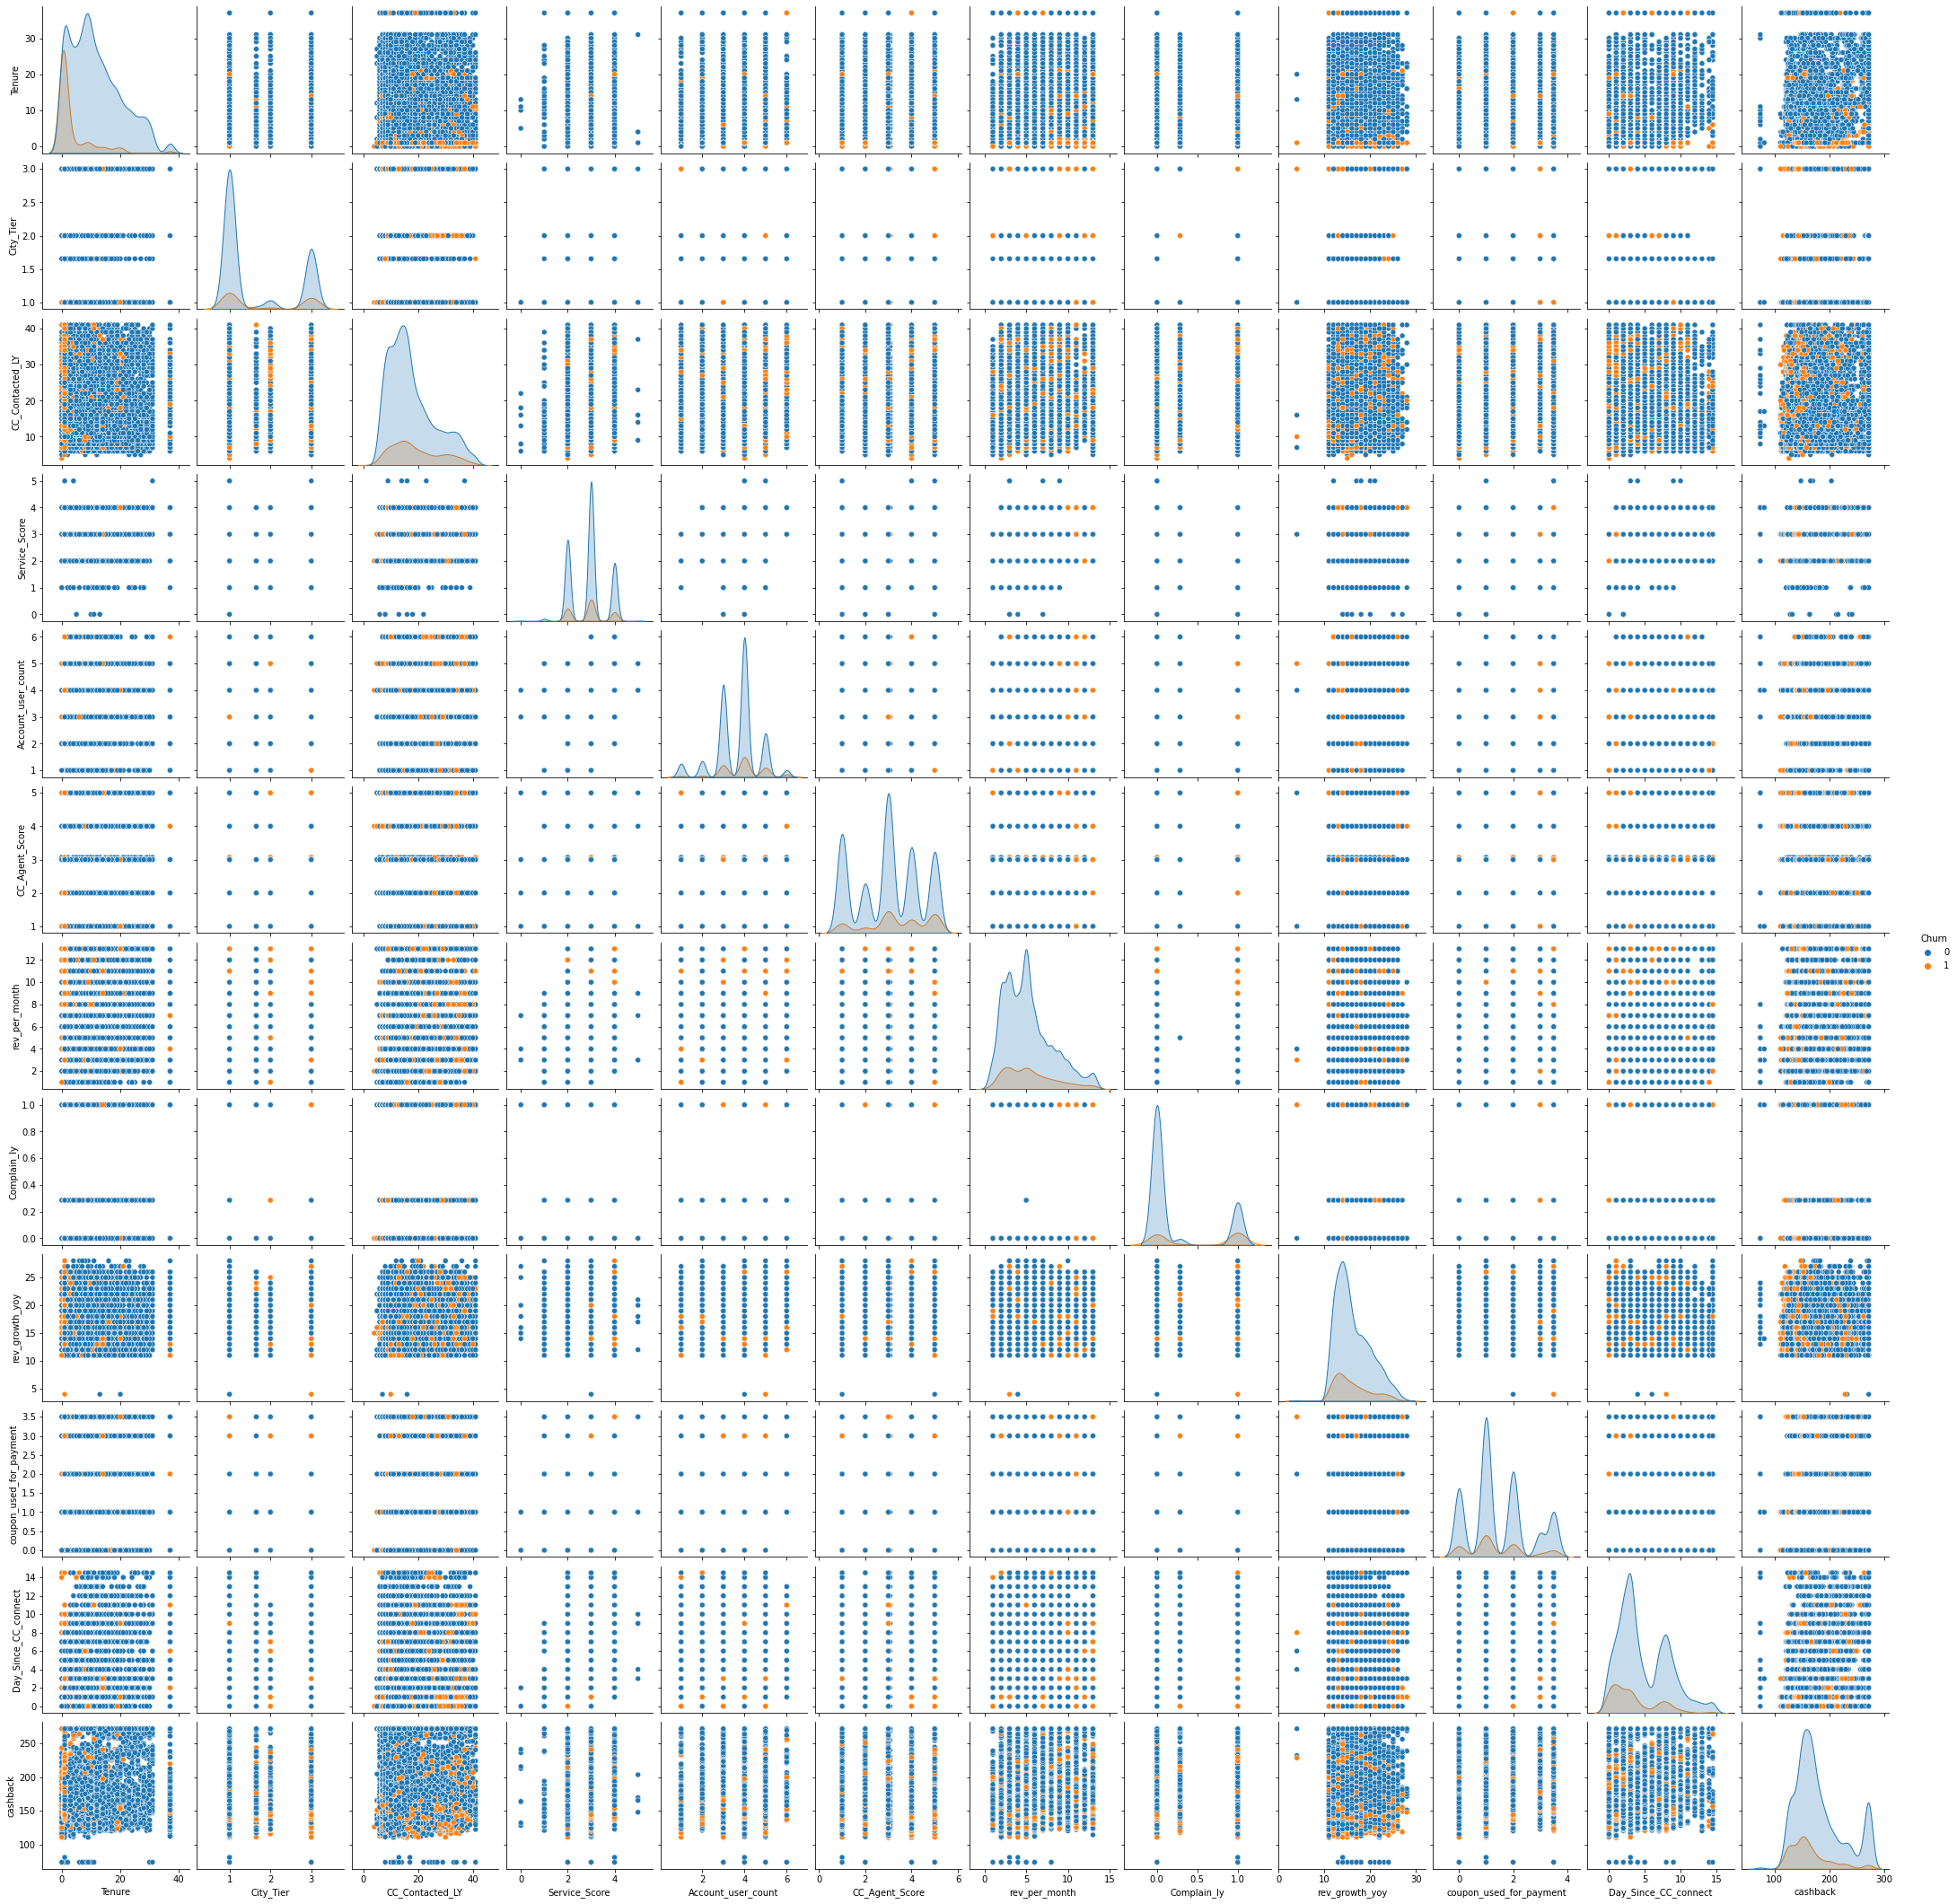

In [86]:
sns.pairplot(df,hue='Churn',diag_kind='kde')

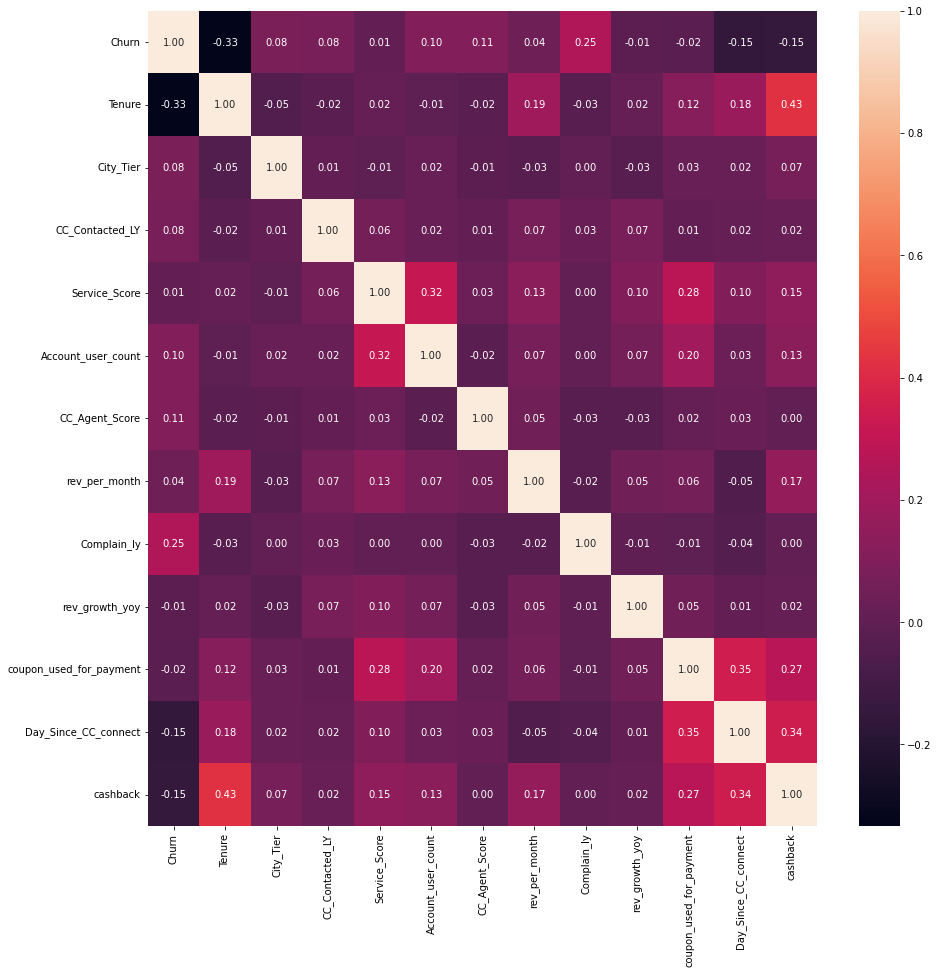

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [88]:
df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [89]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature]= pd.Categorical(df[feature]).codes

In [90]:
df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                       int8
Gender                        int8
Service_Score              float64
Account_user_count         float64
account_segment               int8
CC_Agent_Score             float64
Marital_Status                int8
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                  int8
dtype: object

In [91]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,1
3,1,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [92]:
df['Churn'].value_counts(normalize= True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
# Split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit and resample data
X_res, y_res = sm.fit_resample(X, y)

In [95]:
df_new = pd.concat([X_res, y_res], axis=1)

In [96]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,1
3,1,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [97]:
df_new['Churn'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [98]:
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

# Model Building
# 1 Logistic Regression

In [99]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [100]:
X= df_new.drop('Churn', axis= 1)
y= df_new.pop('Churn')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [102]:
y_train.value_counts(normalize= True)

1    0.50042
0    0.49958
Name: Churn, dtype: float64

In [103]:
y_test.value_counts(normalize= True)

0    0.500979
1    0.499021
Name: Churn, dtype: float64

In [104]:
model = LogisticRegression(solver= 'newton-cg', max_iter=10000, penalty='none', verbose= True,n_jobs= 2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [105]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [106]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.585096,0.414904
1,0.158558,0.841442
2,0.674208,0.325792
3,0.958175,0.041825
4,0.799470,0.200530


In [107]:
model.score(X_train, y_train)

0.8036463498359906

AUC: 0.880


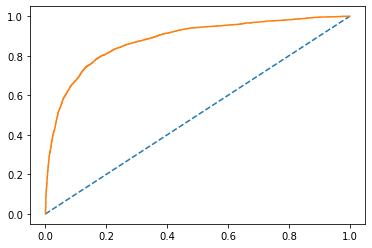

In [108]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [109]:
model.score(X_test, y_test)

0.799252536038441

AUC: 0.880


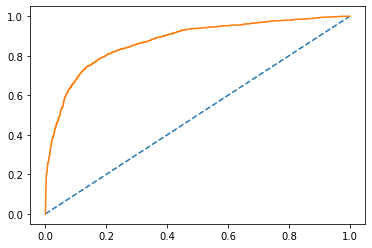

In [110]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [111]:
confusion_matrix(y_train, ytrain_predict)

array([[5118, 1431],
       [1143, 5417]], dtype=int64)

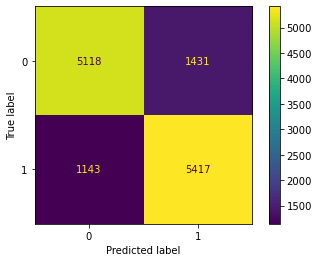

In [112]:
plot_confusion_matrix(model,X_train,y_train);

In [113]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6549
           1       0.79      0.83      0.81      6560

    accuracy                           0.80     13109
   macro avg       0.80      0.80      0.80     13109
weighted avg       0.80      0.80      0.80     13109



In [114]:
confusion_matrix(y_test, ytest_predict)

array([[2198,  617],
       [ 511, 2293]], dtype=int64)

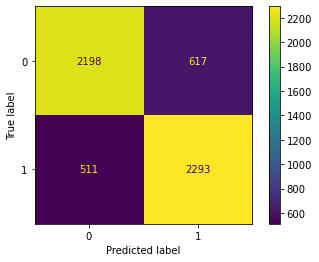

In [115]:
plot_confusion_matrix(model,X_test,y_test);

In [116]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2815
           1       0.79      0.82      0.80      2804

    accuracy                           0.80      5619
   macro avg       0.80      0.80      0.80      5619
weighted avg       0.80      0.80      0.80      5619



In [117]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [118]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [119]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [120]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [121]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [122]:
best_model = grid_search.best_estimator_

In [123]:
ytrain_predict= best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [124]:
ytest_predict_prob= best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573001,0.426999
1,0.163195,0.836805
2,0.680084,0.319916
3,0.959138,0.040862
4,0.797359,0.202641


              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6549
           1       0.79      0.83      0.81      6560

    accuracy                           0.80     13109
   macro avg       0.80      0.80      0.80     13109
weighted avg       0.80      0.80      0.80     13109
 



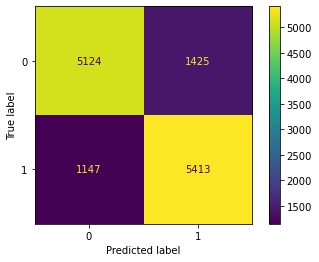

In [125]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2815
           1       0.79      0.82      0.80      2804

    accuracy                           0.80      5619
   macro avg       0.80      0.80      0.80      5619
weighted avg       0.80      0.80      0.80      5619
 



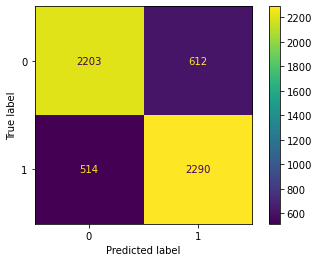

In [126]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n')

# 2 Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [129]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [130]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, train_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             verbose=1)

In [131]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                       random_state=1)

In [132]:
gs_dtcl.best_score_

0.8984670258497129

In [133]:
from sklearn import tree

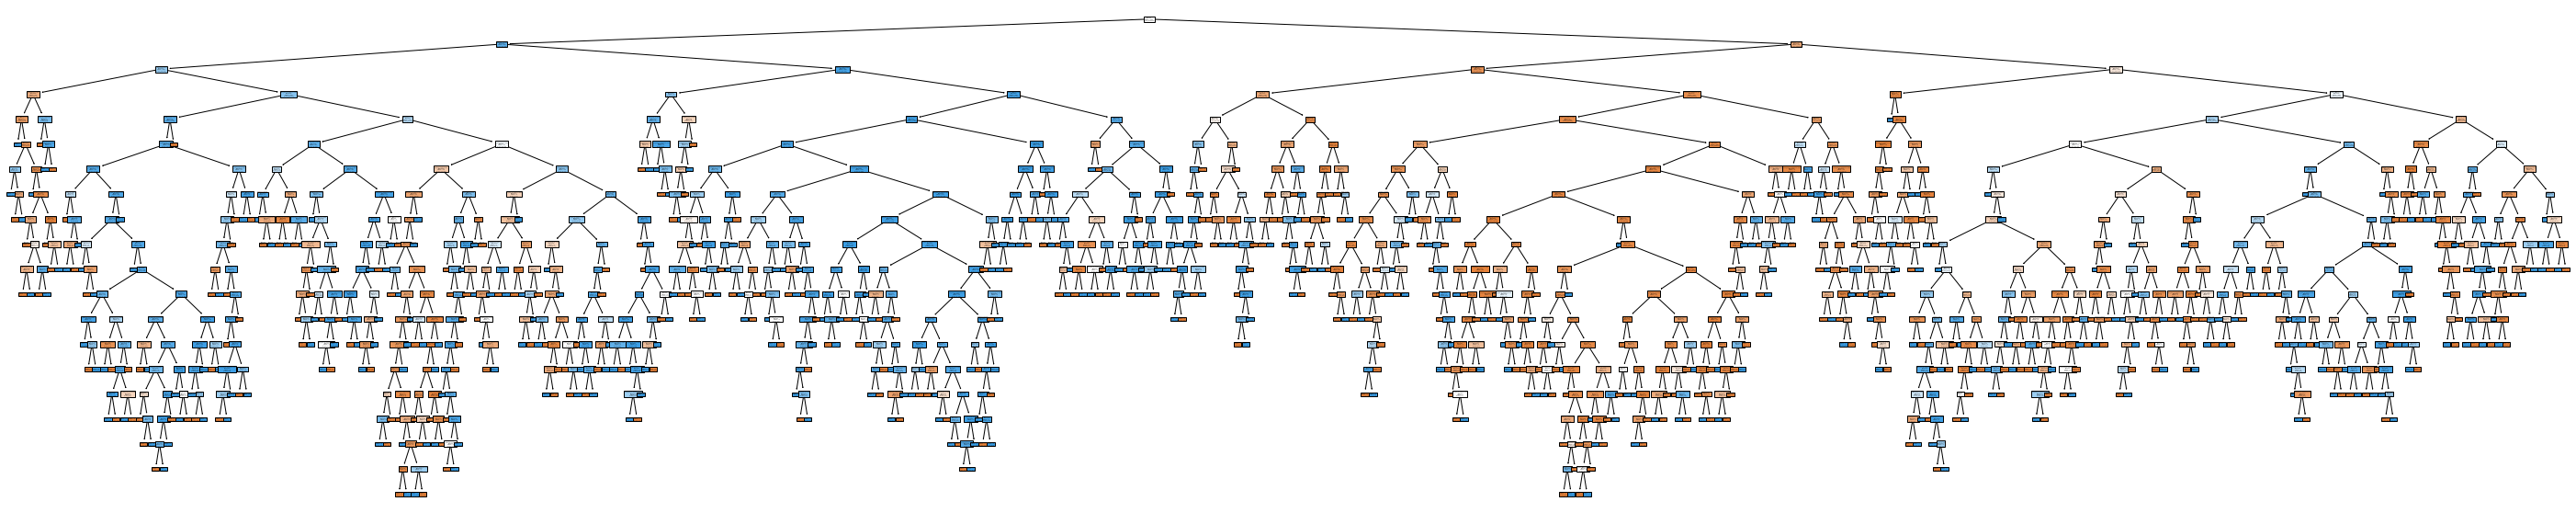

In [134]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [135]:
dt_imp = pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
print(dt_imp)

                              Imp
Tenure                   0.408745
City_Tier                0.031755
CC_Contacted_LY          0.040128
Payment                  0.023824
Gender                   0.012721
Service_Score            0.007311
Account_user_count       0.024196
account_segment          0.038411
CC_Agent_Score           0.078191
Marital_Status           0.011618
rev_per_month            0.055575
Complain_ly              0.109085
rev_growth_yoy           0.034229
coupon_used_for_payment  0.015635
Day_Since_CC_connect     0.041729
cashback                 0.044841
Login_device             0.022005


In [136]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dtcl.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

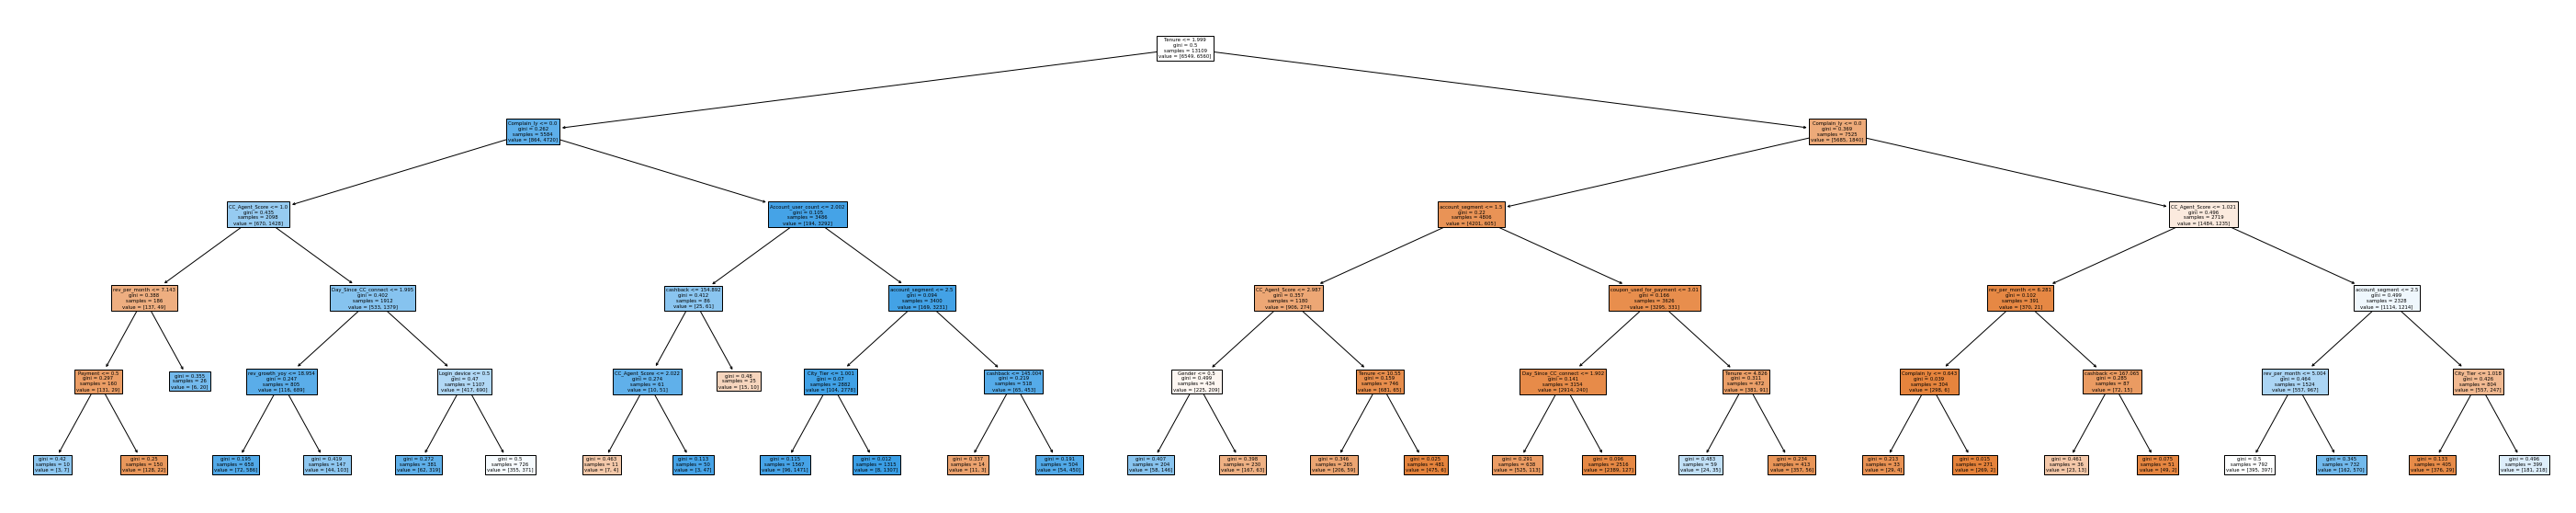

In [137]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [138]:
ytrain_predict = reg_dtcl.predict(X_train)
ytest_predict = reg_dtcl.predict(X_test)
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.976378,0.023622
1,0.000000,1.000000
2,0.096774,0.903226
3,0.002160,0.997840
4,0.975758,0.024242


In [139]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.761905,0.238095
1,0.421053,0.578947
2,0.997487,0.002513
3,0.471698,0.528302
4,1.000000,0.000000


In [140]:
confusion_matrix(train_labels, ytrain_predict)

array([[5026, 1523],
       [ 513, 6047]], dtype=int64)

In [141]:
confusion_matrix(test_labels, ytest_predict)

array([[2159,  656],
       [ 246, 2558]], dtype=int64)

In [142]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.9225722785872301

In [143]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.9035415554369105

In [144]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6549
           1       0.80      0.92      0.86      6560

    accuracy                           0.84     13109
   macro avg       0.85      0.84      0.84     13109
weighted avg       0.85      0.84      0.84     13109



In [145]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2815
           1       0.80      0.91      0.85      2804

    accuracy                           0.84      5619
   macro avg       0.85      0.84      0.84      5619
weighted avg       0.85      0.84      0.84      5619



AUC: 0.925


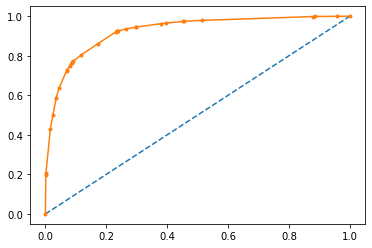

In [146]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.917


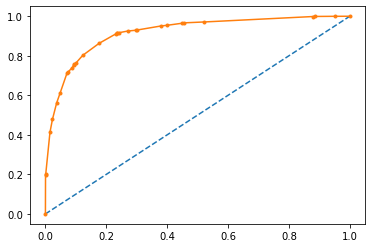

In [147]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

In [148]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.8
cart_train_recall  0.92
cart_train_f1  0.86


In [149]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.8
cart_test_recall  0.91
cart_test_f1  0.85


In [150]:
reg_dt_imp = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                          index = X_train.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp)

                              Imp
Tenure                   0.503342
Complain_ly              0.133643
CC_Agent_Score           0.077442
rev_per_month            0.050847
account_segment          0.040100
Day_Since_CC_connect     0.036408
City_Tier                0.027450
Login_device             0.022450
cashback                 0.021433
CC_Contacted_LY          0.018798
rev_growth_yoy           0.016552
Account_user_count       0.013573
Marital_Status           0.011651
Gender                   0.010734
Payment                  0.007917
coupon_used_for_payment  0.005126
Service_Score            0.002533


# 3 Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid = {
    'max_depth': [5, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [155]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [156]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [157]:
best_grid = grid_search.best_estimator_

In [158]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [159]:
confusion_matrix(train_labels,ytrain_predict)

array([[5955,  594],
       [ 680, 5880]], dtype=int64)

In [160]:
confusion_matrix(test_labels,ytest_predict)

array([[2542,  273],
       [ 341, 2463]], dtype=int64)

In [161]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6549
           1       0.91      0.90      0.90      6560

    accuracy                           0.90     13109
   macro avg       0.90      0.90      0.90     13109
weighted avg       0.90      0.90      0.90     13109



In [162]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2815
           1       0.90      0.88      0.89      2804

    accuracy                           0.89      5619
   macro avg       0.89      0.89      0.89      5619
weighted avg       0.89      0.89      0.89      5619



AUC: 0.968


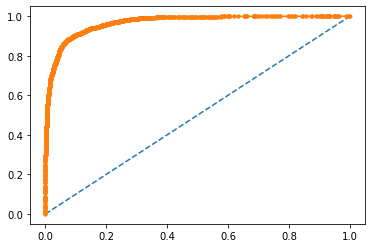

In [163]:
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.959


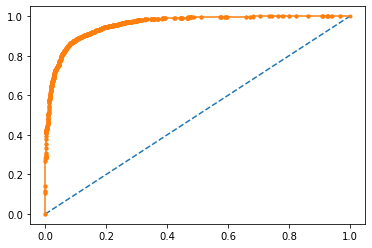

In [164]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [165]:
from sklearn.preprocessing import StandardScaler

# 4 Baggaing

In [166]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [167]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6549    0]
 [   0 6560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [168]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9754404698344902
[[2744   71]
 [  67 2737]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2815
           1       0.97      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



In [169]:
sc = StandardScaler()

In [170]:
X_train = sc.fit_transform(X_train)

In [171]:
X_train

array([[ 0.04915071,  1.42889562,  1.82892926, ..., -0.61051984,
        -1.12822848,  0.72115206],
       [-0.88143602, -0.79938242,  0.05535936, ..., -1.208931  ,
         0.71748864, -1.3866701 ],
       [-0.88143602, -0.79938242, -0.91296758, ...,  0.88550808,
        -0.71915724, -1.3866701 ],
       ...,
       [-0.53246599, -0.79938242, -1.07788946, ..., -0.90972542,
        -0.24696528, -1.3866701 ],
       [-0.88143602, -0.79938242,  1.43943842, ..., -1.208931  ,
        -1.08939532, -1.3866701 ],
       [ 2.60826422, -0.79938242, -1.42670771, ..., -0.61051984,
        -0.10253867,  0.72115206]])

In [172]:
X_test = sc.transform(X_test)

In [173]:
X_test

array([[-0.76511268, -0.79938242, -0.26398022, ..., -0.90972542,
        -0.50641145,  0.72115206],
       [ 1.56135415, -0.79938242, -0.26398022, ..., -0.31131425,
        -0.15708403,  0.72115206],
       [-0.41614265, -0.79938242, -1.42670771, ..., -0.31131425,
        -0.7207984 , -1.3866701 ],
       ...,
       [-0.29981931, -0.79938242,  0.08483803, ...,  0.58630249,
         0.27690727,  0.72115206],
       [ 1.09606078,  1.42889562,  1.82892926, ...,  2.08233041,
         1.45437546,  0.72115206],
       [-0.76511268, -0.79938242,  1.59638376, ...,  1.48391924,
        -0.15708403, -1.3866701 ]])

# 5  ANN

In [174]:
from sklearn.neural_network import MLPClassifier

In [175]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=500,solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [176]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.71861319
Iteration 2, loss = 0.64206388
Iteration 3, loss = 0.59355921
Iteration 4, loss = 0.56007208
Iteration 5, loss = 0.53508590
Iteration 6, loss = 0.51586553
Iteration 7, loss = 0.50048817
Iteration 8, loss = 0.48808202
Iteration 9, loss = 0.47787092
Iteration 10, loss = 0.46928929
Iteration 11, loss = 0.46208260
Iteration 12, loss = 0.45592303
Iteration 13, loss = 0.45059947
Iteration 14, loss = 0.44592181
Iteration 15, loss = 0.44173972
Iteration 16, loss = 0.43802899
Iteration 17, loss = 0.43465318
Iteration 18, loss = 0.43154874
Iteration 19, loss = 0.42866192
Iteration 20, loss = 0.42599802
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [177]:
from sklearn.metrics import confusion_matrix,classification_report

In [178]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2220,  595],
       [ 529, 2275]], dtype=int64)

In [179]:
pred2 = clf.predict(X_train)
confusion_matrix(y_train,pred2)

array([[5168, 1381],
       [1139, 5421]], dtype=int64)

In [180]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6549
           1       0.80      0.83      0.81      6560

    accuracy                           0.81     13109
   macro avg       0.81      0.81      0.81     13109
weighted avg       0.81      0.81      0.81     13109



In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2815
           1       0.79      0.81      0.80      2804

    accuracy                           0.80      5619
   macro avg       0.80      0.80      0.80      5619
weighted avg       0.80      0.80      0.80      5619



AUC: 0.891


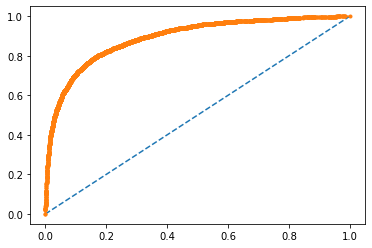

In [182]:
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.884


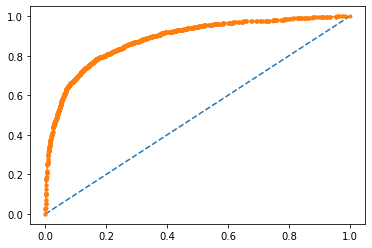

In [183]:
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# 6 KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [185]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9785643451064154
[[6305  244]
 [  37 6523]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6549
           1       0.96      0.99      0.98      6560

    accuracy                           0.98     13109
   macro avg       0.98      0.98      0.98     13109
weighted avg       0.98      0.98      0.98     13109



In [186]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9556860651361452
[[2590  225]
 [  24 2780]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2815
           1       0.93      0.99      0.96      2804

    accuracy                           0.96      5619
   macro avg       0.96      0.96      0.96      5619
weighted avg       0.96      0.96      0.96      5619



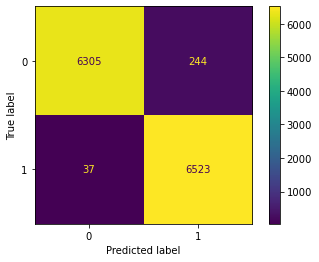

In [187]:
plot_confusion_matrix(KNN_model,X_train,y_train);

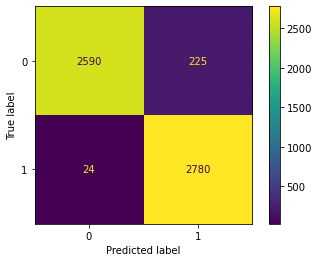

In [188]:
plot_confusion_matrix(KNN_model,X_test,y_test);